In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgames2.csv', index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 1. EDA

In [3]:
df.duplicated().sum()

1

In [4]:
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df.duplicated(subset='Name').sum()

5104

In [7]:
display(df[df['Name'] == 'Bejeweled 3'])
display(df[df['Name'] == 'LEGO Batman: The Videogame'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2711,Bejeweled 3,PC,2010.0,Puzzle,PopCap Games,0.02,0.05,0,0.01
4609,Bejeweled 3,PS3,NaN,Puzzle,Unknown,0.13,0,0,0.01
10270,Bejeweled 3,DS,NaN,Puzzle,Unknown,0.32,0.02,0,0.03
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3348,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0,0.29
3776,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.79,1.06,0,0.29
4816,LEGO Batman: The Videogame,PC,2008.0,Action,Warner Bros. Interactive Entertainment,0.02,0.03,0,0.01
5593,LEGO Batman: The Videogame,X360,2008.0,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0,0.32
5850,LEGO Batman: The Videogame,PS3,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.42,0,0.19
9642,LEGO Batman: The Videogame,PS2,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.03,0,0.52
9959,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0,0.28


본 데이터셋의 키값이라 볼 수 있는 'Name'컬럼의 내용이 중복값이 아주 많음 \
위 데이터처럼, 같은 게임이 다양한 플랫폼으로 출시되었음을 알 수 있음 \
그리고 년도나 장르 등은 같은 게임의 다른 행을 참고로 하여 채울 수 있을 것으로 보임

또 우리의 목표는 총 판매량 50만장 달성이기 때문에 \
이에 부합하는 데이터만 정제하여 살펴 보기로 한다. \
이를 위해 총 판매량을 나타내는 'Total_Sales' 컬럼을 생성하고자 함.

우선 각 지역의 판매량을 모두 합산한 값을 'Total_Sales'에 저장한 후,
전체 판매량이 높은 게임을 대상으로 플랫폼 및 기타 컬럼의 데이터 확인하기로 함

##### 가. 총 판매량 컬럼 생성

In [8]:
display(df['NA_Sales'].value_counts())
display(df['EU_Sales'].value_counts())
display(df['JP_Sales'].value_counts())
display(df['Other_Sales'].value_counts())

0        4442
0.02      537
0.01      536
0.03      528
0.05      523
         ... 
6.91        1
3.88        1
4.14        1
1.11M       1
4.18        1
Name: NA_Sales, Length: 494, dtype: int64

0        5664
0.01     1480
0.02     1255
0.03      925
0.04      734
         ... 
1.88        1
8.89        1
2.93M       1
2130K       1
7.06        1
Name: EU_Sales, Length: 363, dtype: int64

0        10333
0.02       715
0.01       696
0.03       521
0.04       393
         ...  
0.77M        1
2.1          1
1.5          1
2.54         1
1.37         1
Name: JP_Sales, Length: 282, dtype: int64

0       6385
0.01    3412
0.02    1567
0.03     926
0.04     660
        ... 
1.05       1
340K       1
1.78       1
1.41       1
2.26       1
Name: Other_Sales, Length: 190, dtype: int64

판매량을 나타내는 컬럼에 'M', 'K'같은 숫자 이외의 문자 확인됨 \
→ 'M'은 백만단위를 나타낸 것으로, 다른 값들이 백만단위로 작성된 것으로 보아 'M' 제거 \
→ 'K'는 천 단위를 나타낸 것으로, 다른 값들과 비교하여 제거 후 단위 맞춰주고자 함

In [9]:
# 'M' 제거
def deleteM(x):
    for i in x:
        df[i] = df[i].str.replace('M','')


In [10]:
x = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
deleteM(x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\2117046400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].str.replace('M','')


In [11]:
#'M'이 포함된 행 없음 확인
for i in x:
    print(df[i].str.contains('M').sum())

0
0
0
0


이어서 Sales컬럼들의 'K'가 포함된 행을 찾아 제거, 백만단위로 값을 맞춰줌

In [12]:
def deleteK(x):
    for i in x:
        temp_K = df[df[i].str.contains('K')][i]
        temp_K = temp_K.str.replace('K','').astype(float)/1000
        df.loc[temp_K.index, i] = temp_K

In [13]:
deleteK(x)

In [14]:
#'K' 포함된 행 없음 확인
for i in x:
    print(df[i].str.contains('K').sum())

0
0
0
0


이제 각 지역 판매량 컬럼의 데이터타입을 실수형으로 조정한 후,
전체 합산한 값을 'Total_Sales'컬럼에 저장함

In [15]:
for i in x:
    df[i] = df[i].astype(float)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\1445694863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(float)


In [16]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\2152599233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']


In [17]:
df['Total_Sales'].agg(['min', 'max'])

min     0.00
max    82.74
Name: Total_Sales, dtype: float64

Sales 컬럼 정제 및 Total_Sales 컬럼 생성 완료

-----------------------------------------------------------------------------------------------------


##### 나. 결측치 대체 및 제거

결측치를 제거 및 대체하는데 있어

- 게임 이름이 유일한 데이터
- 게임 이름이 중복되는(여러 플랫폼 출시) 데이터
- 게임 이름은 중복되나 결측치 정보를 찾을 수 없는 데이터

로 경우를 나누어 결측치 제거 및 대체가 진행되어야 할 것으로 보임

In [18]:
# 컬럼의 'Unknown'을 결측치로 대체
df[df.iloc[:,:] == 'Unknown'] = np.NaN

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\2513112774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.iloc[:,:] == 'Unknown'] = np.NaN
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\2513112774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.iloc[:,:] == 'Unknown'] = np.NaN


In [19]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher      261
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

결측치가 있는 컬럼은 'Year', 'Genre', 'Publisher'로 총 3개의 컬럼임

#### 가. 게임 이름이 유일한 데이터

In [21]:
# 게임 이름이 유일한 데이터 
temp = {k: v for k, v in df['Name'].value_counts().items() if v==1}
df_uniq = df[df['Name'].isin(list(temp.keys()))]
# 총 판매량 50만장 이상 데이터
df_uniq_up = df_uniq[df_uniq['Total_Sales'] >= 0.5]
# 총 판매량 50만장 미만 데이터
df_uniq_drop = df_uniq[df_uniq['Total_Sales'] < 0.5]

In [22]:
display(df_uniq_up)
display(df_uniq_drop)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
11,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.00,0.06,0.87
41,Vagrant Story,PS,2000.0,Role-Playing,Crave Entertainment,0.30,0.20,0.30,0.06,0.86
43,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007.0,Adventure,Capcom,0.33,0.05,0.25,0.04,0.67
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
67,Kirby: Mass Attack,DS,2011.0,Platform,Nintendo,0.52,0.06,0.41,0.05,1.04
...,...,...,...,...,...,...,...,...,...,...
16546,Boom Blox,Wii,2008.0,Puzzle,Electronic Arts,0.72,0.38,0.00,0.12,1.22
16551,Syphon Filter 3,PS,2001.0,Shooter,Sony Computer Entertainment,0.29,0.20,0.00,0.03,0.52
16566,Toshochu: Run for Money,3DS,2012.0,Adventure,Namco Bandai Games,0.00,0.00,0.62,0.00,0.62
16567,Um Jammer Lammy,PS,1998.0,Misc,Sony Computer Entertainment,0.12,0.08,0.41,0.04,0.65


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.0,0.00,0.00,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.0,0.14,0.00,0.14
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.0,0.11,0.01,0.19
...,...,...,...,...,...,...,...,...,...,...
16587,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000.0,Sports,Konami Digital Entertainment,0.00,0.0,0.08,0.01,0.09
16590,Namco Soccer Prime Goal,PS,1995.0,Sports,Sony Computer Entertainment,0.00,0.0,0.12,0.01,0.13
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.0,0.05,0.00,0.05
16593,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0.00,0.0,0.02,0.00,0.02


In [23]:
# df_uniq의 년도 결측치 확인
print('게임 이름이 유일한 데이터의 결측치 수')
print('년도 :',df_uniq_up['Year'].isnull().sum())
print('장르 :',df_uniq_up['Genre'].isnull().sum())
print('발매사 :',df_uniq_up['Publisher'].isnull().sum())

게임 이름이 유일한 데이터의 결측치 수
년도 : 14
장르 : 11
발매사 : 13


결측치가 몇 개 되지 않기 때문에, 검색해서 직접 입력해주기로 함

In [24]:
df_uniq_up[df_uniq_up['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3032,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.00,0.04,1.03
3563,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
3943,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.00,0.07,1.05
5145,Yakuza 4,PS3,NaN,Action,Sega,0.15,0.14,0.63,0.05,0.97
5721,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01,1.30
6576,Fishing Derby,2600,NaN,Sports,Activision,0.48,0.03,0.00,0.01,0.52
10085,Advance Wars: Days of Ruin,DS,NaN,Strategy,Nintendo,0.44,0.13,0.00,0.06,0.63
11310,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
11317,Air-Sea Battle,2600,NaN,Shooter,Atari,0.91,0.06,0.00,0.01,0.98
12391,WarioWare: Twisted!,GBA,NaN,Puzzle,NaN,0.16,0.06,0.50,0.02,0.74


In [25]:
df_uniq_up.loc[df_uniq_up[df_uniq_up['Year'].isnull()].index, 'Year'] = [1997, 2005, 1999, 2010, 1980, 1980, 2008, 1998, 1977, 2004, 2001, 2006, 2002, 1977]

In [26]:
df_uniq_up['Genre'].value_counts()

Role-Playing    239
Action          207
Sports          190
Misc            185
Platform        170
Racing          134
Shooter         134
Simulation      124
Fighting         93
Puzzle           72
Strategy         67
Adventure        62
Name: Genre, dtype: int64

In [27]:
df_uniq_up[df_uniq_up['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.00,0.04,0.00,0.57,0.61
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35
4599,Wii Party,Wii,2010.0,NaN,Nintendo,1.79,3.53,2.49,0.68,8.49
5669,Chrono Cross,PS,1999.0,NaN,SquareSoft,0.62,0.42,0.69,0.12,1.85
9489,Final Fantasy XII,PS2,2006.0,NaN,Square Enix,1.88,0.00,2.33,1.74,5.95
11064,Yakuza 3,PS3,2009.0,NaN,Sega,0.21,0.21,0.62,0.08,1.12
11497,F-Zero X,N64,1998.0,NaN,Nintendo,0.45,0.33,0.29,0.03,1.10
12332,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,0.99,0.48,1.09,0.14,2.70
15427,"WarioWare, Inc.: Mega Party Game$",GC,2003.0,NaN,Nintendo,0.20,0.05,0.44,0.02,0.71


In [28]:
df_uniq_up.loc[df_uniq_up[df_uniq_up['Genre'].isnull()].index, 'Genre'] = ['Sports', 'Action', 'Role-Playing', 'Misc', 'Role-Playing', 'Role-Playing', 'Action', 'Racing', 'Action', 'Misc', 'Action']

In [29]:
df_uniq_up[df_uniq_up['Publisher'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
606,God Eater,PSP,2010.0,Action,NaN,0.00,0.00,0.72,0.00,0.72
1962,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3563,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
4008,The Game of Life,PS,1998.0,Misc,NaN,0.46,0.31,0.00,0.05,0.82
7819,RIFT,PC,2011.0,Role-Playing,NaN,0.44,0.16,0.00,0.07,0.67
8237,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.94
9487,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,NaN,0.00,1.10,0.42,0.33,1.85
11310,Triple Play 99,PS,1998.0,Sports,NaN,0.81,0.55,0.00,0.10,1.46
12391,WarioWare: Twisted!,GBA,2004.0,Puzzle,NaN,0.16,0.06,0.50,0.02,0.74
12901,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64


In [30]:
df_uniq_up.loc[df_uniq_up[df_uniq_up['Publisher'].isnull()].index, 'Publisher'] = ['Namco Bandai Games', 'Majesco', 'THQ', 'Hasbro', 'Trion Worlds', 'SCEA', 'Sony Computer Entertainment', 'Electronic Arts', 'Nintendo', 'Majesco', 'Konami Digital Entertainment', 'Majesco', 'Majesco']

In [31]:
#총 판매량 50만 장 이상, 유일한 게임 이름의 데이터 결측치 없음 확인
df_uniq_up.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

이제 게임 이름이 유일한 데이터 중, 총 판매량이 50만장에 못 미치는 데이터 검색 \
→ 데이터를 결측치로 만들어 전체 행 제거

df_uniq_up를 df에 병합함으로써 게임이름이 유일한 데이터 중 총 판매량이 0.5를 상회하는 데이터들의 결측치 제거
df_uniq_drop을 df에 병합함으로써 게임이름이 유일한 데이터 중 총 판매량이 0.5에 못 미치는 데이터 제거

In [32]:
# 총 판매량이 50만장에 못 미치는 데이터 전체 결측치로
df_uniq_drop.loc[:,:] = np.nan

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\3227107006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uniq_drop.loc[:,:] = np.nan
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\3227107006.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_uniq_drop.loc[:,:] = np.nan


In [33]:
df.loc[df_uniq_up.index] = df_uniq_up
df.loc[df_uniq_drop.index] = df_uniq_drop

In [34]:
#게임이름이 유일한 데이터 중 총 판매량이 0.5에 못 미치는 데이터 제거
df = df.dropna(subset=['Name'])

In [35]:
df.isnull().sum()

Name             0
Platform         0
Year           147
Genre           20
Publisher       89
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [50]:
df.shape

(9566, 10)

------------------------------------------

#### 나. 게임 이름이 중복되는 데이터

이제 게임 이름이 중복되는 데이터의 결측치를 채우고자 함 \
우선 게임 이름순으로 정렬, 인덱스 재부여함

In [36]:
df = df.sort_values(['Name', 'Year'], ascending = True)
df_sort_name = df.set_index('Name')
df_sort_name

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
.hack//Infection Part 1,PS2,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
.hack//Mutation Part 2,PS2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
007 Racing,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...
pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.45
uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00,0.02


In [37]:
# 게임이름으로 데이터를 그룹핑한 후 'Total_Sales' 값이 0.5에 못 미치는 데이터를 모두 제거
group_name = df_sort_name.groupby('Name').sum()
group_name_drop = group_name[group_name['Total_Sales'] < 0.5]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19100\624280868.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_name = df_sort_name.groupby('Name').sum()


In [38]:
for i in group_name_drop.index:
  df_sort_name.loc[i, :] = np.nan

In [39]:
#게임이름이 중복인 데이터 중 총 판매량이 0.5에 못 미치는 데이터 제거(여기서는 플랫폼 값을 기준으로 drop)
df_sort_name = df_sort_name.dropna(subset=['Platform'])

In [40]:
#결측치 줄어든 것 확인
df_sort_name.isnull().sum()

Platform        0
Year           94
Genre          12
Publisher      39
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64

In [47]:
df_sort_name.iloc[1020:1030]

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Dead Island: Riptide,X360,2013.0,Action,Deep Silver,0.44,0.27,0.01,0.07,0.79
Dead Island: Riptide,PS3,2013.0,Action,Deep Silver,0.26,0.20,0.07,0.09,0.62
Dead Island: Riptide,PC,NaN,Action,Deep Silver,0.00,0.07,0.00,0.01,0.08
Dead Rising,X360,2006.0,Action,Capcom,1.16,0.65,0.08,0.20,2.09
Dead Rising,PS4,2016.0,Action,Capcom,0.01,0.00,0.00,0.00,0.01
Dead Rising 2,X360,2010.0,Action,Capcom,0.75,0.53,0.09,0.12,1.49
Dead Rising 2,PC,2010.0,Action,Capcom,0.10,0.02,0.00,0.01,0.13
Dead Rising 2,PS3,2010.0,Action,Capcom,0.43,0.57,0.15,0.22,1.37
Dead Rising 2: Off the Record,PS3,2011.0,Action,Capcom,0.11,0.08,0.10,0.03,0.32


남은 결측치들은 게임 이름이 같은 데이터들인데, 모든 데이터들이 게임이름을 기준으로 정렬되어 있고, 결측치는 가장 하단에 위치함 \
→ 결측치를 같은 열의 위의 값으로 채우기로 함

In [48]:
df_sort_name = df_sort_name.ffill()

In [49]:
#결측치 제거 및 대체 완료
df_sort_name.isnull().sum()

Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [51]:
df = df_sort_name.reset_index()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
1,.hack//Mutation Part 2,PS2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
2,007 Racing,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
3,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...,...
6888,pro evolution soccer 2011,PSP,2010.0,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
6889,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
6890,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
6891,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.45


In [52]:
df['Year'].value_counts()

2008.0    602
2009.0    572
2007.0    528
2010.0    522
2011.0    454
2005.0    417
2003.0    368
2004.0    355
2002.0    353
2006.0    346
2012.0    318
2013.0    296
2014.0    287
2015.0    225
2001.0    193
1999.0    149
1998.0    141
2000.0    132
1997.0    109
2016.0     93
1996.0     80
1995.0     47
1994.0     42
1993.0     26
1992.0     25
1982.0     22
1981.0     22
1986.0     18
1991.0     15
1988.0     14
1990.0     14
1989.0     14
1984.0     13
1987.0     12
1985.0     11
1983.0     10
1980.0      8
11.0        5
8.0         5
3.0         4
6.0         4
10.0        3
96.0        2
1977.0      2
98.0        2
95.0        2
1.0         2
4.0         2
86.0        1
7.0         1
5.0         1
2.0         1
14.0        1
16.0        1
9.0         1
Name: Year, dtype: int64

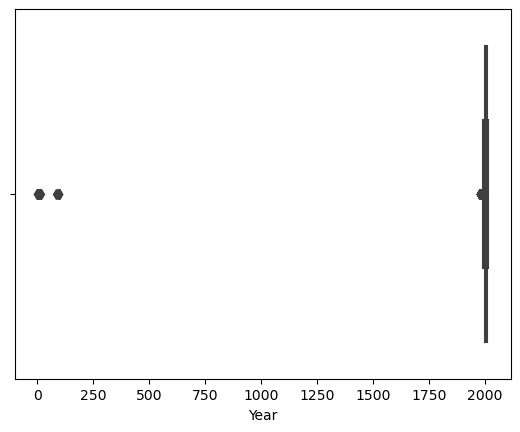

In [53]:
sns.boxplot(x=df.Year);

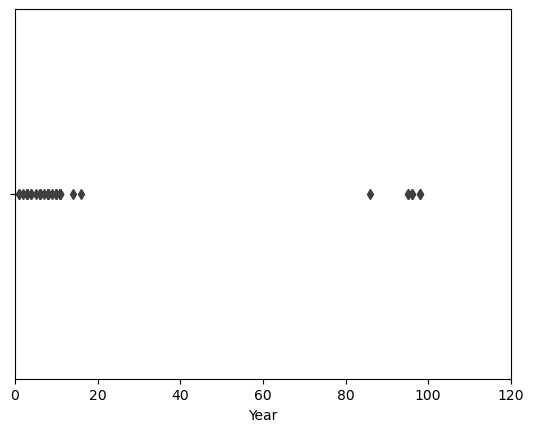

In [54]:
plt.xlim(0, 120)
sns.boxplot(x=df.Year);

결측치 제거 과정 중, 년도 값에 이상치 발견함. 이상치 수정 후 데이터타입을 정수형으로 바꾸고자 함.

In [55]:
df[df['Year'] < 20]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
537,Brink,X360,11.0,Shooter,Bethesda Softworks,0.59,0.35,0.01,0.09,1.04
936,DC Universe Online,PS3,11.0,Role-Playing,Sony Online Entertainment,0.35,0.12,0.00,0.06,0.53
1158,Diner Dash: Sizzle & Serve,DS,7.0,Puzzle,Eidos Interactive,0.34,0.03,0.00,0.03,0.40
1220,Disney's Aladdin,GBA,3.0,Platform,Capcom,0.02,0.01,0.00,0.00,0.03
1314,Dragon Age Origins: Awakening,PC,10.0,Role-Playing,Electronic Arts,0.01,0.10,0.00,0.02,0.13
1339,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05,0.50
1564,F.E.A.R. 3,X360,11.0,Shooter,Warner Bros. Interactive Entertainment,0.30,0.11,0.01,0.04,0.46
1873,Ford Racing 3,GBA,5.0,Racing,Zoo Digital Publishing,0.04,0.02,0.00,0.00,0.06
2580,Karaoke Revolution Presents American Idol Encore,PS3,8.0,Misc,Konami Digital Entertainment,0.08,0.00,0.00,0.01,0.09
2627,Kingdom Hearts: Birth by Sleep,PSP,10.0,Role-Playing,Square Enix,0.63,0.42,0.75,0.26,2.06


년도값 20을 기준으로

- 20 미만의 값에는 2000을 더하고
- 이외의 값에는 1900을 더한다.


In [66]:
def fix_year(x):
    if x < 20:
        x += 2000
    elif x < 100 and x > 80:
        x += 1900
    return round(x)

In [67]:
df['Year'] = df['Year'].apply(fix_year)

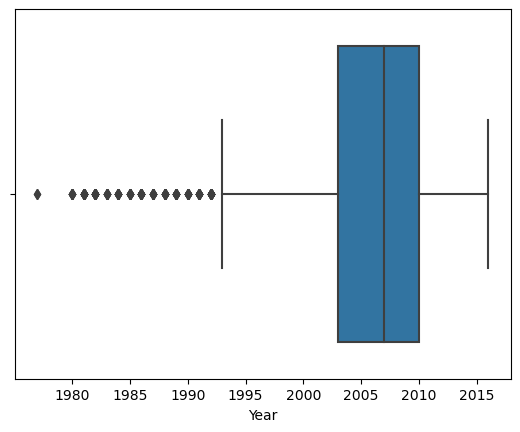

In [68]:
sns.boxplot(x=df.Year);

In [69]:
# 'Year'컬럼 데이터 이상치 없음 확인
df['Year'].describe()

count    6893.000000
mean     2006.336283
std         6.045322
min      1977.000000
25%      2003.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: Year, dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6893 non-null   object 
 1   Platform     6893 non-null   object 
 2   Year         6893 non-null   int64  
 3   Genre        6893 non-null   object 
 4   Publisher    6893 non-null   object 
 5   NA_Sales     6893 non-null   float64
 6   EU_Sales     6893 non-null   float64
 7   JP_Sales     6893 non-null   float64
 8   Other_Sales  6893 non-null   float64
 9   Total_Sales  6893 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 538.6+ KB


전처리 완료한 데이터를 csv파일로 저장하여 시각화에 활용

In [72]:
df.to_csv('vgames.csv')